## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  72.218161  1314.081785  0.628528  9.106955  1.527770
1  17.276905   756.091356  0.262374  2.317237  1.513006
2  52.562439   530.534999  0.010065  7.926478  0.101885
3  70.862507   745.111313  0.115450  2.516574  0.943955
4  63.765273   231.465720  0.151708  9.077959  0.397563


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0126666	total: 69.3ms	remaining: 1m 9s
1:	learn: 1.0011310	total: 69.9ms	remaining: 34.9s
2:	learn: 0.9905267	total: 70.4ms	remaining: 23.4s
3:	learn: 0.9798212	total: 71.1ms	remaining: 17.7s
4:	learn: 0.9697006	total: 71.7ms	remaining: 14.3s
5:	learn: 0.9611018	total: 72.3ms	remaining: 12s
6:	learn: 0.9495386	total: 72.8ms	remaining: 10.3s
7:	learn: 0.9383505	total: 73.4ms	remaining: 9.1s
8:	learn: 0.9275195	total: 73.8ms	remaining: 8.13s
9:	learn: 0.9182623	total: 74.3ms	remaining: 7.36s
10:	learn: 0.9095012	total: 74.8ms	remaining: 6.72s
11:	learn: 0.9001942	total: 75.3ms	remaining: 6.2s
12:	learn: 0.8894882	total: 75.7ms	remaining: 5.75s
13:	learn: 0.8796419	total: 76.2ms	remaining: 5.36s
14:	learn: 0.8685738	total: 76.8ms	remaining: 5.04s
15:	learn: 0.8597295	total: 77.3ms	remaining: 4.75s
16:	learn: 0.8483809	total: 77.7ms	remaining: 4.49s
17:	learn: 0.8398547	total: 78.2ms	remaining: 4.26s
18:	learn: 0.8314944	total: 78.6ms	remaining: 4.

83:	learn: 0.4440775	total: 107ms	remaining: 1.17s
84:	learn: 0.4403458	total: 108ms	remaining: 1.16s
85:	learn: 0.4371182	total: 108ms	remaining: 1.15s
86:	learn: 0.4340726	total: 109ms	remaining: 1.14s
87:	learn: 0.4301531	total: 109ms	remaining: 1.13s
88:	learn: 0.4270165	total: 110ms	remaining: 1.12s
89:	learn: 0.4238660	total: 110ms	remaining: 1.11s
90:	learn: 0.4195979	total: 111ms	remaining: 1.1s
91:	learn: 0.4161634	total: 111ms	remaining: 1.1s
92:	learn: 0.4127372	total: 112ms	remaining: 1.09s
93:	learn: 0.4102945	total: 112ms	remaining: 1.08s
94:	learn: 0.4066962	total: 113ms	remaining: 1.07s
95:	learn: 0.4031190	total: 113ms	remaining: 1.07s
96:	learn: 0.3994069	total: 114ms	remaining: 1.06s
97:	learn: 0.3952295	total: 114ms	remaining: 1.05s
98:	learn: 0.3921712	total: 115ms	remaining: 1.04s
99:	learn: 0.3886163	total: 115ms	remaining: 1.03s
100:	learn: 0.3854503	total: 115ms	remaining: 1.03s
101:	learn: 0.3823851	total: 116ms	remaining: 1.02s
102:	learn: 0.3791842	total: 11

253:	learn: 0.1452952	total: 186ms	remaining: 545ms
254:	learn: 0.1445311	total: 186ms	remaining: 544ms
255:	learn: 0.1438081	total: 187ms	remaining: 543ms
256:	learn: 0.1431127	total: 187ms	remaining: 541ms
257:	learn: 0.1426704	total: 188ms	remaining: 539ms
258:	learn: 0.1422694	total: 188ms	remaining: 538ms
259:	learn: 0.1418914	total: 188ms	remaining: 536ms
260:	learn: 0.1412378	total: 189ms	remaining: 535ms
261:	learn: 0.1405645	total: 189ms	remaining: 533ms
262:	learn: 0.1399789	total: 190ms	remaining: 531ms
263:	learn: 0.1392709	total: 190ms	remaining: 530ms
264:	learn: 0.1383802	total: 190ms	remaining: 528ms
265:	learn: 0.1377499	total: 191ms	remaining: 527ms
266:	learn: 0.1370887	total: 191ms	remaining: 525ms
267:	learn: 0.1365702	total: 192ms	remaining: 524ms
268:	learn: 0.1361441	total: 192ms	remaining: 523ms
269:	learn: 0.1355314	total: 193ms	remaining: 522ms
270:	learn: 0.1349863	total: 193ms	remaining: 520ms
271:	learn: 0.1342783	total: 194ms	remaining: 519ms
272:	learn: 

491:	learn: 0.0608558	total: 289ms	remaining: 299ms
492:	learn: 0.0605515	total: 290ms	remaining: 298ms
493:	learn: 0.0604337	total: 290ms	remaining: 297ms
494:	learn: 0.0601714	total: 290ms	remaining: 296ms
495:	learn: 0.0598752	total: 291ms	remaining: 295ms
496:	learn: 0.0596783	total: 291ms	remaining: 295ms
497:	learn: 0.0595629	total: 292ms	remaining: 294ms
498:	learn: 0.0593084	total: 292ms	remaining: 293ms
499:	learn: 0.0591951	total: 292ms	remaining: 292ms
500:	learn: 0.0589455	total: 293ms	remaining: 291ms
501:	learn: 0.0586910	total: 293ms	remaining: 291ms
502:	learn: 0.0585004	total: 293ms	remaining: 290ms
503:	learn: 0.0583081	total: 294ms	remaining: 289ms
504:	learn: 0.0581224	total: 294ms	remaining: 288ms
505:	learn: 0.0580409	total: 295ms	remaining: 288ms
506:	learn: 0.0579578	total: 295ms	remaining: 287ms
507:	learn: 0.0578758	total: 295ms	remaining: 286ms
508:	learn: 0.0576946	total: 296ms	remaining: 285ms
509:	learn: 0.0576141	total: 296ms	remaining: 284ms
510:	learn: 

672:	learn: 0.0391497	total: 368ms	remaining: 179ms
673:	learn: 0.0390622	total: 368ms	remaining: 178ms
674:	learn: 0.0390168	total: 369ms	remaining: 178ms
675:	learn: 0.0389728	total: 369ms	remaining: 177ms
676:	learn: 0.0388873	total: 370ms	remaining: 176ms
677:	learn: 0.0387773	total: 370ms	remaining: 176ms
678:	learn: 0.0387184	total: 371ms	remaining: 175ms
679:	learn: 0.0386615	total: 371ms	remaining: 175ms
680:	learn: 0.0386172	total: 372ms	remaining: 174ms
681:	learn: 0.0384446	total: 372ms	remaining: 173ms
682:	learn: 0.0383886	total: 373ms	remaining: 173ms
683:	learn: 0.0383221	total: 373ms	remaining: 172ms
684:	learn: 0.0382014	total: 373ms	remaining: 172ms
685:	learn: 0.0380944	total: 374ms	remaining: 171ms
686:	learn: 0.0380396	total: 374ms	remaining: 171ms
687:	learn: 0.0379966	total: 375ms	remaining: 170ms
688:	learn: 0.0378293	total: 375ms	remaining: 169ms
689:	learn: 0.0377063	total: 376ms	remaining: 169ms
690:	learn: 0.0376638	total: 376ms	remaining: 168ms
691:	learn: 

898:	learn: 0.0213058	total: 472ms	remaining: 53ms
899:	learn: 0.0212440	total: 472ms	remaining: 52.5ms
900:	learn: 0.0211465	total: 473ms	remaining: 51.9ms
901:	learn: 0.0210859	total: 473ms	remaining: 51.4ms
902:	learn: 0.0210466	total: 473ms	remaining: 50.8ms
903:	learn: 0.0210097	total: 474ms	remaining: 50.3ms
904:	learn: 0.0209503	total: 474ms	remaining: 49.8ms
905:	learn: 0.0209098	total: 474ms	remaining: 49.2ms
906:	learn: 0.0208154	total: 475ms	remaining: 48.7ms
907:	learn: 0.0207360	total: 475ms	remaining: 48.1ms
908:	learn: 0.0206999	total: 475ms	remaining: 47.6ms
909:	learn: 0.0205950	total: 476ms	remaining: 47.1ms
910:	learn: 0.0204927	total: 476ms	remaining: 46.5ms
911:	learn: 0.0204740	total: 477ms	remaining: 46ms
912:	learn: 0.0204555	total: 477ms	remaining: 45.5ms
913:	learn: 0.0203556	total: 478ms	remaining: 44.9ms
914:	learn: 0.0203374	total: 478ms	remaining: 44.4ms
915:	learn: 0.0202583	total: 478ms	remaining: 43.9ms
916:	learn: 0.0201608	total: 479ms	remaining: 43.3

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

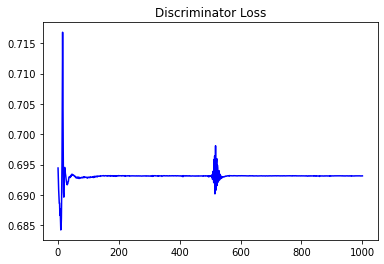

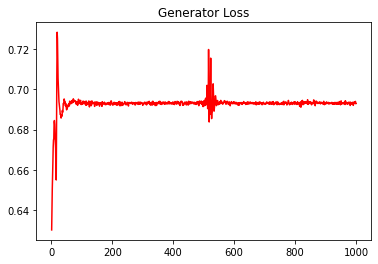

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.1632161002381838


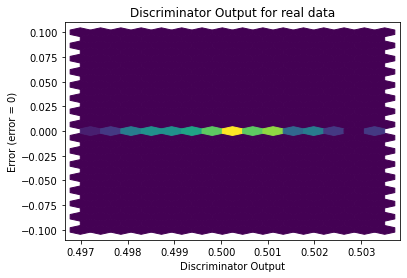

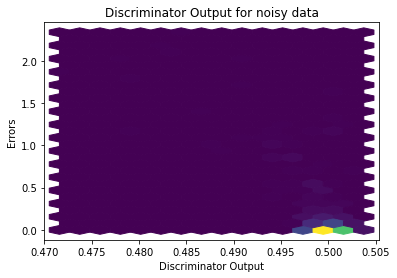

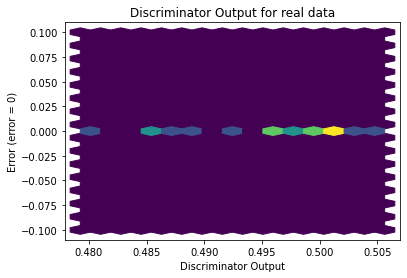

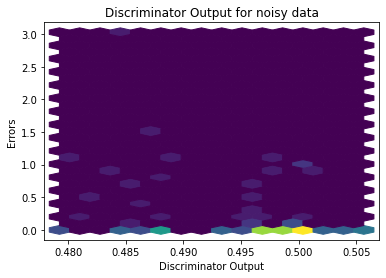

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


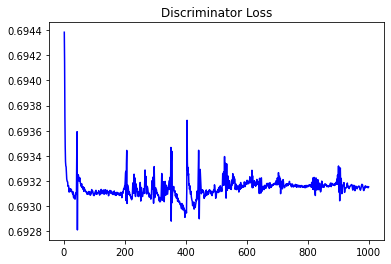

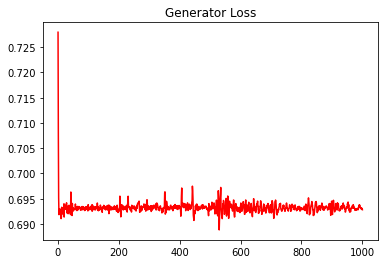

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.18493529391699015


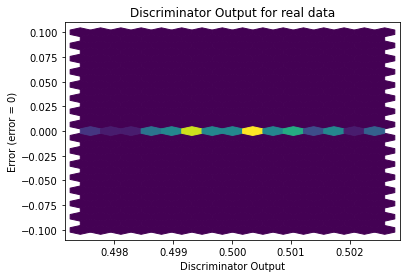

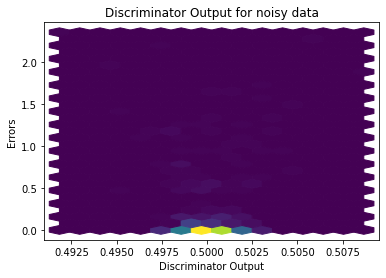

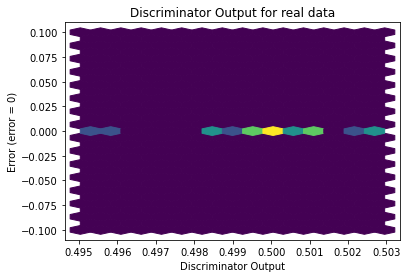

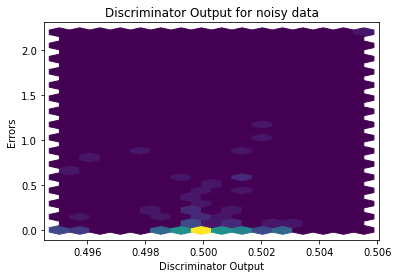

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0330]], requires_grad=True)
